# ANOVA WHO Infant Mortality

# Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats  
import seaborn as sns     
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset Excel file

In [ ]:
df=pd.read_excel('/content/ANOVA1.xlsx')

# Check the top 5 records

In [ ]:
df.head()

,Sal_Group,Status,Infant_Deaths,Deathsunderfive
0,Mid Income,Developing,74,75
1,Mid Income,Developing,75,76
2,Mid Income,Developing,77,78
3,Mid Income,Developing,75,76
4,Mid Income,Developing,78,79


# Check the shape and information of the dataframe

In [ ]:
df.shape

(64, 4)

# Check the summary of the dataframe

In [ ]:
print(df.info(),'\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sal_Group        64 non-null     object
 1   Status           64 non-null     object
 2   Infant_Deaths    64 non-null     int64 
 3   Deathsunderfive  64 non-null     int64 
 4   sds              64 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.6+ KB
None 

       Infant_Deaths  Deathsunderfive
count      64.000000         64.00000
mean       70.984375         71.59375
std        12.297234         13.49276
min        28.000000         29.00000
25%        72.000000         73.75000
50%        74.000000         76.00000
75%        77.000000         78.00000
max        79.000000         81.00000


# Check for missing values

In [ ]:
df.isna().any()

Sal_Group          False
Status             False
Infant_Deaths      False
Deathsunderfive    False
dtype: bool

# Check distinct values of Salary Group

In [ ]:
print(df.Sal_Group.value_counts())
print(df.Sal_Group.nunique())

Mid Income     36
Low Income     19
High Income     9
Name: Sal_Group, dtype: int64
3


# Check distinct values of Status

In [ ]:
df.Status.value_counts()

Developing    35
Developed     29
Name: Status, dtype: int64

# Creat box plots

In [ ]:
for i in df.select_dtypes(include='int64'):
  fig=px.box(df,y=i,color='Status')
  fig.show()

In [ ]:
for i in df.select_dtypes(include='int64'):
  fig=px.box(df,y=i,color='Sal_Group')
  fig.show()

# Formulate the hypothesis of the One-way ANOVA of 'Status' variable with the 'Deathsunderfive' variable.

- Null Hypothesis - Population mean of Status and Deathsunderfive is equal.
             H0 = Udeveloping = Udeveloped
- Alternative Hypothesis - Population mean of Status and Deathsunderfive is not equal. 
             H1 = Udeveloping != Udeveloped

#Probability test 
 
- value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution.

In [ ]:
stats.shapiro(df.Deathsunderfive)

ShapiroResult(statistic=0.5463014841079712, pvalue=9.158120225713495e-13)

The data is normally distributed as can be seen from both shapiro and the probability test that the p value is greater than 0.05. The random samples taken from a normally distributed population is one of the assumptions to carry out ANOVA which can be seen being violated in this case. However, this wont make your test wrong but the result will surely be subjected to variation.

In [ ]:
df

,Sal_Group,Status,Infant_Deaths,Deathsunderfive
0,Mid Income,Developing,74,75
1,Mid Income,Developing,75,76
2,Mid Income,Developing,77,78
3,Mid Income,Developing,75,76
4,Mid Income,Developing,78,79
...,...,...,...,...
59,Mid Income,Developed,77,78
60,High Income,Developed,28,29
61,High Income,Developed,28,29
62,High Income,Developed,28,29


In [ ]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df.isna().any()

Sal_Group          False
Status             False
Infant_Deaths      False
Deathsunderfive    False
dtype: bool

##Variation Test

- If the p-value for the Levene test is greater than . 05, then the variances are not significantly different from each other (i.e., the homogeneity assumption of the variance is met). If the p-value for the Levene's test is less than . 05, then there is a Significant difference between the variances.

In [ ]:
# Groups
s_developing = df.Deathsunderfive[df.Status == 'Developing']
s_developed = df.Deathsunderfive[df.Status == 'Developed']

In [ ]:
stats.levene(s_developing,s_developed)

LeveneResult(statistic=0.7090066722336457, pvalue=0.4030100908719215)

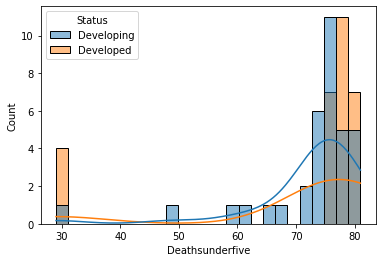

In [ ]:
sns.histplot(x='Deathsunderfive',hue='Status',data=df,kde=True)

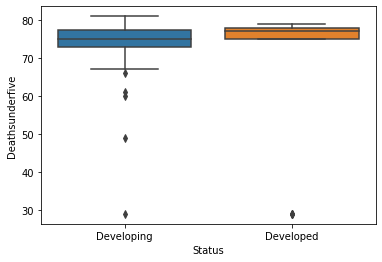

In [ ]:
sns.boxplot(y ='Deathsunderfive',x ='Status', data=df)

In [ ]:
df.groupby('Status')['Deathsunderfive'].mean()

Status
Developed     70.655172
Developing    72.371429
Name: Deathsunderfive, dtype: float64

# One-way ANOVA with the 'Status' variable.

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
formula='Deathsunderfive ~ C(Status)'
model= ols(formula,df).fit()
aov_table= anova_lm(model)
print(aov_table)


             df        sum_sq     mean_sq         F    PR(>F)
C(Status)   1.0     46.714347   46.714347  0.253555  0.616367
Residual   62.0  11422.723153  184.237470       NaN       NaN


- As the P-value is greater than 0.05 we fail to reject the null hypothesis. Thus, we can say that the population mean of the two population is same.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison 

In [ ]:
mcomp=MultiComparison(df.Deathsunderfive,df.Status)
print(mcomp.tukeyhsd().summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2   meandiff p-adj  lower  upper  reject
---------------------------------------------------------
Developed Developing   1.7163 0.6267 -5.097 8.5295  False
---------------------------------------------------------


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd # For performing the Tukey-HSD test
from statsmodels.stats.multicomp import MultiComparison # To compare the levels of independent with the dependent variables

In [ ]:
mcomp = MultiComparison(df.Deathsunderfive, df.Status)
print(mcomp.tukeyhsd().summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2   meandiff p-adj  lower  upper  reject
---------------------------------------------------------
Developed Developing   1.7163 0.6267 -5.097 8.5295  False
---------------------------------------------------------


Per Tukeyhsd we can say that the means of the two population is same be it developing or developed for the deathsunderfive.

# Formulate the hypothesis of the One-way ANOVA of 'Sal_Group' variable with the 'Deathsunderfive' variable.

In [ ]:
df.Sal_Group.unique()

array(['Mid Income', 'High Income', 'Low Income'], dtype=object)

Null Hypothesis = the population mean for all is same

                H0 = Um = Uh = Ul

Alternate Hypothesis = One of the population mean from is different
 
                H1 = Us != Uh = Ul
                H1 = Us =  Uh != U1
                H1 = Us = Ul != Uh
                H1 = Us != Ul = Uh

In [ ]:
#Check the assumptions
'''

1. The sample is from a normally distributed population
2. There is equal variance within the population
3. Sample has been taken randomly from the population

'''

'\n\n1. The sample is from a normally distributed population\n2. There is equal variance within the population\n3. Sample has been taken randomly from the population\n\n'

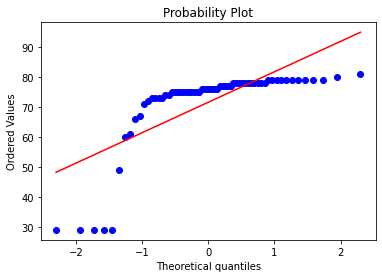

In [ ]:
stats.probplot(df.Deathsunderfive,plot=plt)
plt.show()

In [ ]:
stats.shapiro(df.Deathsunderfive)

ShapiroResult(statistic=0.5463014841079712, pvalue=9.158120225713495e-13)

# One-way ANOVA with the 'Sal_Group' variable.

In [ ]:
df.Sal_Group.value_counts()

Mid Income     36
Low Income     19
High Income     9
Name: Sal_Group, dtype: int64

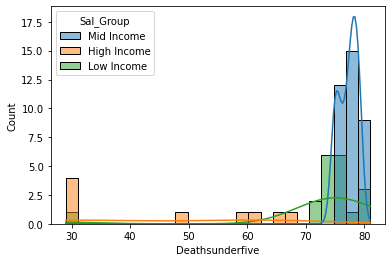

In [ ]:
sns.histplot(data=df,x='Deathsunderfive',kde=True,hue='Sal_Group')

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
formula = 'Deathsunderfive ~ C(Sal_Group)'
model=ols(formula,df).fit()
anov_table = anova_lm(model)
print(anov_table)

                df       sum_sq      mean_sq          F        PR(>F)
C(Sal_Group)   2.0  6809.835161  3404.917580  44.574613  1.171131e-12
Residual      61.0  4659.602339    76.386924        NaN           NaN


In [ ]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
mcomp= MultiComparison(df.Deathsunderfive,df.Sal_Group)
print(mcomp.tukeyhsd().summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj  lower   upper  reject
------------------------------------------------------------
High Income Low Income  26.2339 0.001 17.7383 34.7296   True
High Income Mid Income  30.6667 0.001 22.8423 38.4911   True
 Low Income Mid Income   4.4327 0.182 -1.5207 10.3862  False
------------------------------------------------------------


Thus, we would conclude that there is a statistically significant difference between the means of groups 'High income and Low income' and 'High income and Mid income', but not a statistically significant difference between the means of groups Low income and Mid income.

# Formulate the hypothesis of ANOVA with both 'Status' and 'Sal_Group' variables with respect to the variable 'Deathsunderfive'.

NULL HYPOTHESIS: All the popoulation means are equal.

                  Usg = Ust = Uduf

ALTERNATE HYPOTHESIS: One of the population mean is different from the rest.

               

# ANOVA with both 'Status' and 'Sal_Group' variables with respect to the variable 'Deathsunderfive'.

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula= 'Deathsunderfive ~ C(Sal_Group) + C(Status) + C(Sal_Group) : C(Status)'
model = ols(formula,df).fit()
anov_t = anova_lm(model)
print(anov_t)

                          df       sum_sq      mean_sq          F  \
C(Sal_Group)             2.0  6809.835161  3404.917580  82.338844   
C(Status)                1.0   465.852895   465.852895  11.265409   
C(Sal_Group):C(Status)   2.0  1754.596330   877.298165  21.215115   
Residual                59.0  2439.797895    41.352507        NaN   

                              PR(>F)  
C(Sal_Group)            8.438510e-18  
C(Status)               1.386202e-03  
C(Sal_Group):C(Status)  1.143394e-07  
Residual                         NaN  


In [ ]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df['sds'] = df['Sal_Group'] + ':' + df['Status']

mcomp = MultiComparison(df['Deathsunderfive'],df['sds'])
print(mcomp.tukeyhsd().summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                 group2         meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------
 High Income:Developed High Income:Developing     31.6  0.001 19.4614 43.7386   True
 High Income:Developed  Low Income:Developing  43.7895  0.001  33.835  53.744   True
 High Income:Developed   Mid Income:Developed    48.32  0.001 38.5754 58.0646   True
 High Income:Developed  Mid Income:Developing     48.0  0.001 37.4347 58.5653   True
High Income:Developing  Low Income:Developing  12.1895 0.0034  3.0944 21.2846   True
High Income:Developing   Mid Income:Developed    16.72  0.001  7.8552 25.5848   True
High Income:Developing  Mid Income:Developing     16.4  0.001  6.6402 26.1598   True
 Low Income:Developing   Mid Income:Developed   4.5305 0.1547 -0.9768 10.0379  False
 Low Income:Developing  Mid Income:Developing   4.2105 0.4266 -2.

There is no statistical signficant difference between the means of the group - 
- Low Income:Developing & Mid Income:Developed  
- Low Income:Developing & Mid Income:Developing   
- Mid Income:Developed  &  Mid Income:Developing

# Plot the interaction plot between the two variables and comment on the extent of interaction between the two categorical variables. 

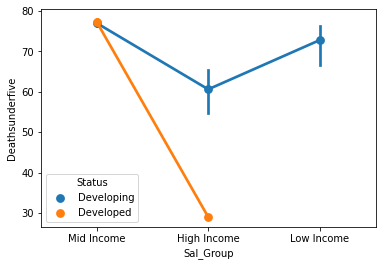

In [ ]:
sns.pointplot(data=df, hue = 'Status', y= 'Deathsunderfive', x='Sal_Group')

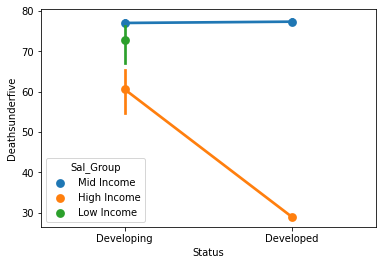

In [ ]:
sns.pointplot(data=df, y='Deathsunderfive',x='Status', hue = 'Sal_Group')

It can be observed that there is some relation between the two categorical variables
